In [ ]:
import os
from glob import glob

import main_fte
from py_utils import data_ops
import evaluate_fte
from lib import app
from py_utils import log

%load_ext autoreload
%autoreload 2

%matplotlib inline

# root_dir = os.path.join("..", "data")
root_dir = os.path.join("/Users/zico/OneDrive - University of Cape Town/CheetahReconstructionResults/cheetah_videos")
# If you are running the code remotely on the Linux i9.
# root_dir = os.path.join("/","data", "dlc", "to_analyse", "cheetah_videos")\
logger = log.logger("main")

In [ ]:
# Generate the pose functions if this has not been done before (note this should only be performed once). It will be saved in the root_dir.
functions = main_fte.create_pose_functions(root_dir)

In [ ]:
# Configurations for the optimisation. 2017_08_29/top/phantom/run1_1 2017_08_29/top/phantom/flick1_1 2019_02_27/kiara/run
# 2017_08_29/top/jules/run1_1
data_path = os.path.join("2017_08_29", "top", "jules", "run1_1")
# 2019_03_09LilyFlick
# 2019_03_09JulesFlick2
# 2017_12_16PhantomFlick2_1
# 2017_12_21/bottom/jules/flick2_1
start_frame = 10
end_frame = 110
dlc_thresh = 0.5
# filtered_markers = ()
filtered_markers = ("r_shoulder", "r_front_knee", "r_front_ankle", "r_front_paw", "r_hip", "r_back_knee", "r_back_ankle", "r_back_paw")

In [ ]:
# Run the optimisation
main_fte.run(root_dir, data_path, start_frame, end_frame, dlc_thresh, drop_out_frame_ranges = ((10, 20), (50, 55), (80, 90)), filtered_markers=filtered_markers, init_ekf=False, single_view=0, pairwise_included=2, generate_reprojection_videos=True, out_dir_prefix="/Users/zico/msc/dev/AcinoSet/data")

2021-08-22T14:09:47.243 | INFO | main_fte: Prepare data - Start
2021-08-22T14:09:47.813 | INFO | main_fte: Load H5 2D DLC prediction data
2021-08-22T14:09:48.232 | INFO | main_fte: Estimate the initial trajectory
2021-08-22T14:09:48.589 | INFO | main_fte: Prepare data - End
2021-08-22T14:09:48.593 | INFO | main_fte: Start frame: 9, End frame: 110, Frame rate: 90
2021-08-22T14:09:48.596 | INFO | main_fte: Setup optimisation - Start
2021-08-22T14:09:48.600 | INFO | main_fte: Drop out frames [25]: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 50, 51, 52, 53, 54, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89)
2021-08-22T14:09:50.247 | INFO | main_fte: Measurement initialisation...Done
2021-08-22T14:09:53.868 | INFO | main_fte: Variable initialisation...Done
2021-08-22T14:10:40.877 | INFO | main_fte: Constaint initialisation...Done
2021-08-22T14:10:43.093 | INFO | main_fte: Objective initialisation...Done
2021-08-22T14:10:43.095 | INFO | main_fte: Setup optimisation - End
2021-08-22T14:10:43.098 | INFO

2021-08-22T14:07:59.935 | WARNING | main_fte: No ground truth labels for this test.


(               count       mean        std       min       25%        50%  \
 nose           446.0   3.258121   2.041535  0.152677  1.940589   2.809220   
 r_eye          331.0   3.119356   1.812407  0.147727  1.828903   2.819818   
 l_eye          265.0   3.153367   2.410369  0.085507  1.557578   2.484564   
 neck_base      446.0   8.939618   7.761392  0.311264  3.552756   6.693185   
 spine          506.0  11.843619  42.176676  0.139883  4.329998   7.435679   
 tail_base      451.0  14.808324  44.855030  1.064721  5.557355   9.749097   
 tail1          464.0  13.488186  36.107524  0.285836  4.764971   8.246161   
 tail2          475.0  12.580782  64.341390  0.114901  2.119066   3.295480   
 r_shoulder     292.0   8.027511   3.796289  0.614726  5.318435   7.746217   
 r_front_knee   342.0  11.187977  11.580015  0.685833  5.540987   8.429165   
 r_front_ankle  445.0  13.921096  13.088291  1.009155  5.989928  10.070847   
 r_front_paw    466.0  18.531384  23.534935  0.552480  6.435627 

/Users/zico/opt/anaconda3/envs/pypy/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


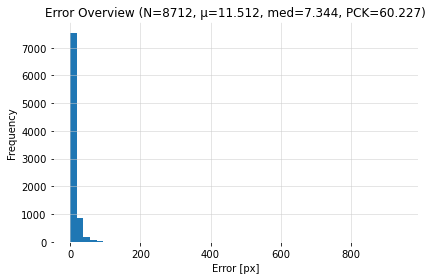

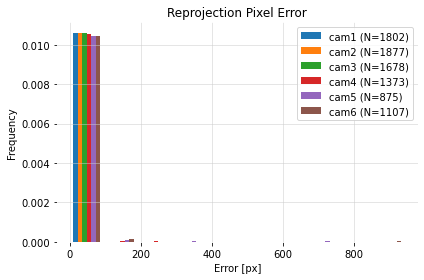

In [8]:
main_fte.metrics(root_dir, data_path, start_frame, end_frame, dlc_thresh, out_dir_prefix="/Users/zico/msc/dev/AcinoSet/data")

In [ ]:
dummy_scene = "/Users/zico/OneDrive - University of Cape Town/CheetahReconstructionResults/cheetah_videos/2017_08_29/top/extrinsic_calib/6_cam_scene_sba.json"
main_fte.plot_trajectory("/Users/zico/msc/dev/monocular_estimation/data/synthesized.pickle", dummy_scene)

In [ ]:
# Compare the optimisation with previous results i.e. compare the output pickle file fte.pickle. This is a visual inspection.abs
main_fte.plot_cheetah(root_dir, data_path, out_dir_prefix="/Users/zico/msc/dev/AcinoSet/data")

In [ ]:
# Compare the optimisation with previous results i.e. compare the output pickle file fte.pickle. This is a visual inspection.abs
main_fte.compare_cheetahs("/Users/zico/msc/dev/monocular_estimation/lily_discrete_trajectory.pickle", root_dir, data_path, out_dir_prefix="/Users/zico/msc/dev/AcinoSet/data")

In [ ]:
eval_dir = os.path.join("/Users/zico/msc/dev/AcinoSet/data", data_path, "fte_pw")
data = data_ops.load_pickle(os.path.join(eval_dir, "fte.pickle"))
results_dir = os.path.join(eval_dir, "evaluation")
os.makedirs(eval_dir, exist_ok=True)
max_delta_acc = evaluate_fte.eval_delta_acc(data, results_dir)
evaluate_fte.eval_model_error(data, results_dir)
evaluate_fte.eval_meas_error(data, results_dir)
logger.info(max_delta_acc)

In [ ]:
fig_fpath = os.path.join(os.path.join(os.path.join("..", "data"), data_path, "fte_pw"), 'fte.svg')
pw_file = data_ops.load_pickle(os.path.join(os.path.join("..", "data"), data_path, "fte_pw", "fte.pickle"))
app.plot_cheetah_states(pw_file["x"], out_fpath=fig_fpath)

In [ ]:
main_fte.plot_cost_functions()